In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import  XGBRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score


/tmp/ipykernel_11726/2607691237.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados['Data ultimo aumento'] = pd.to_datetime(dados['Data ultimo aumento'])


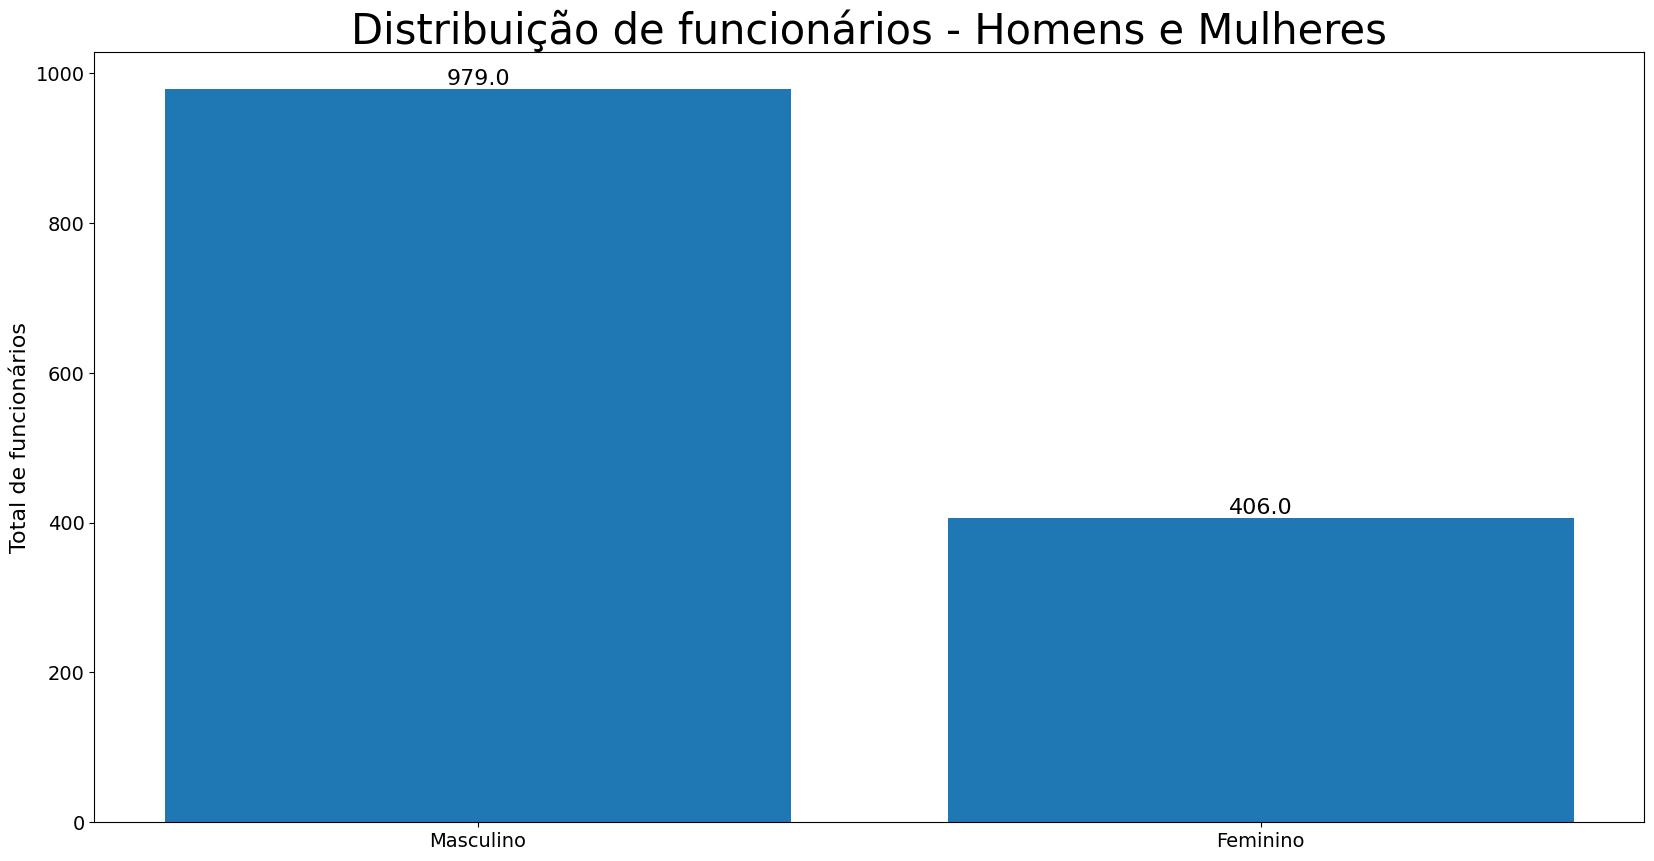

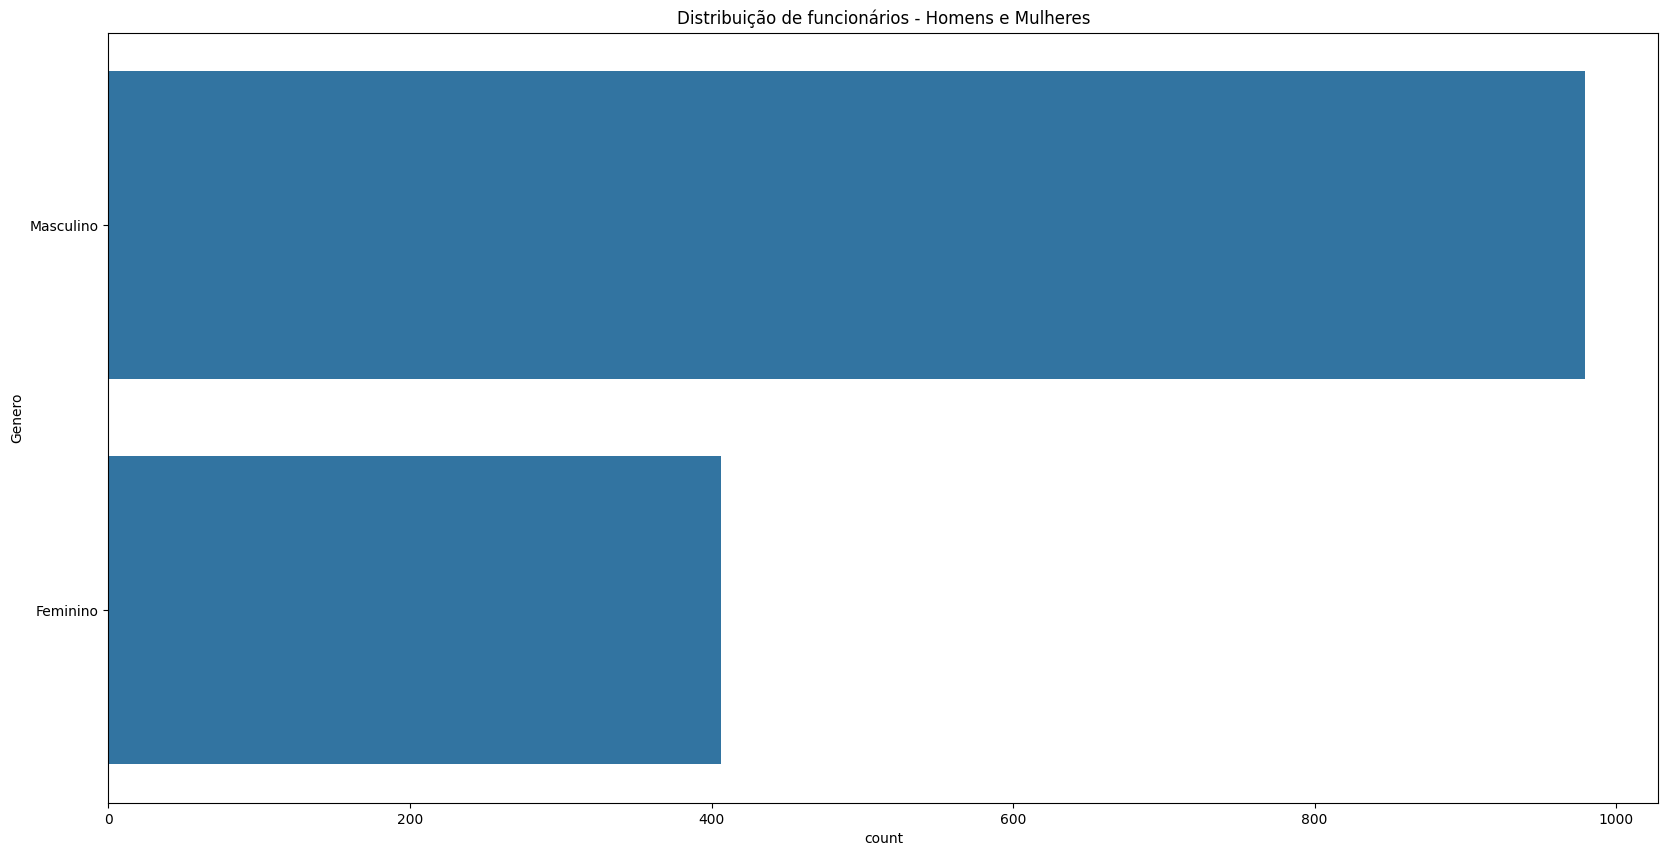

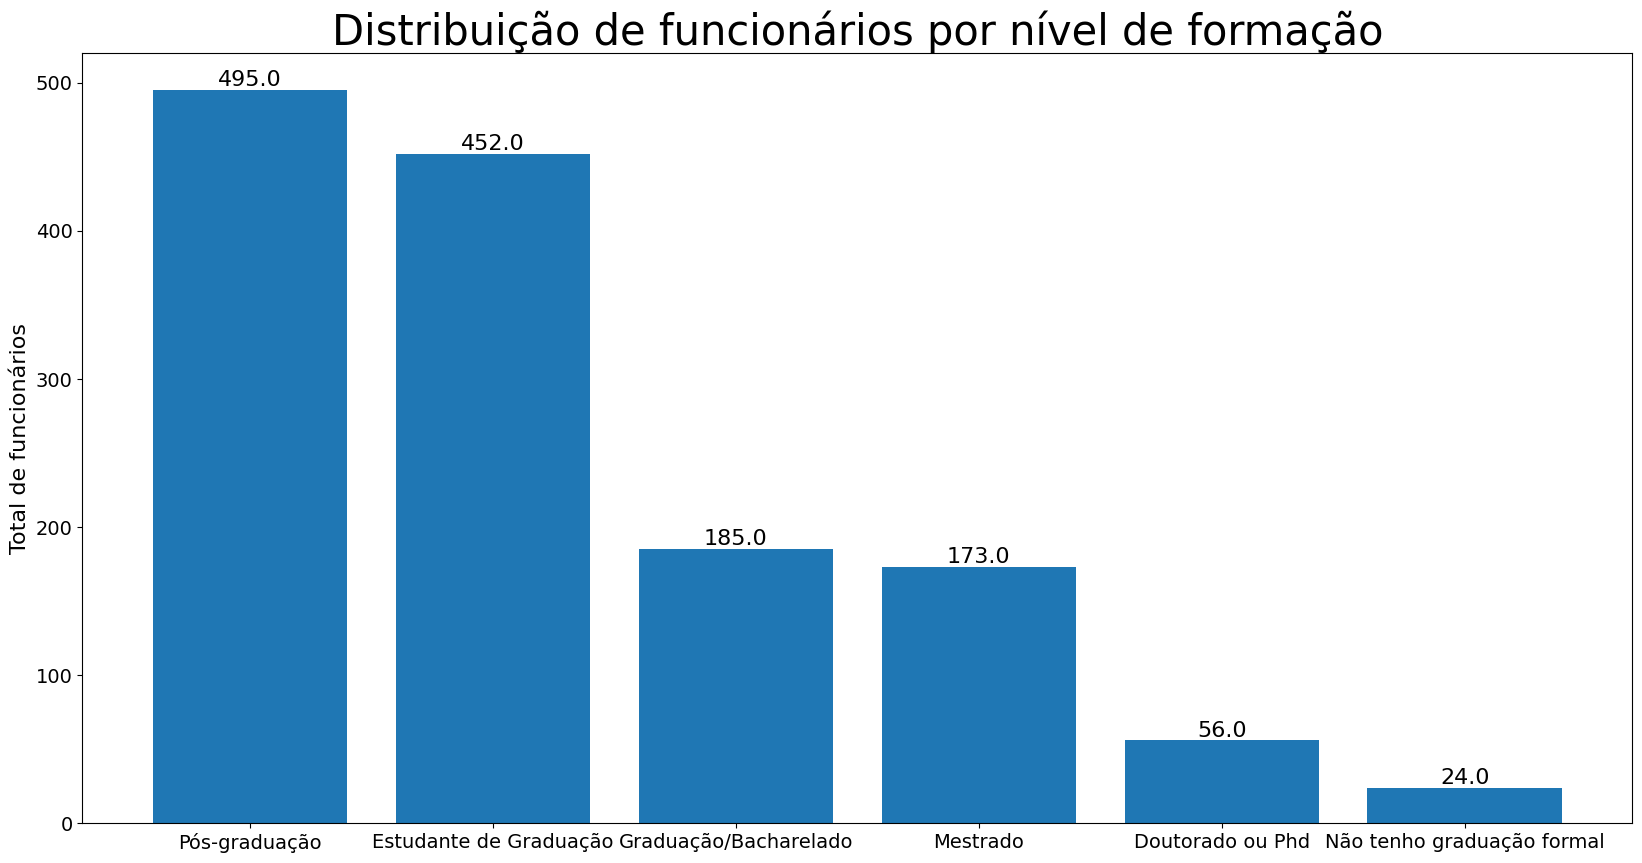

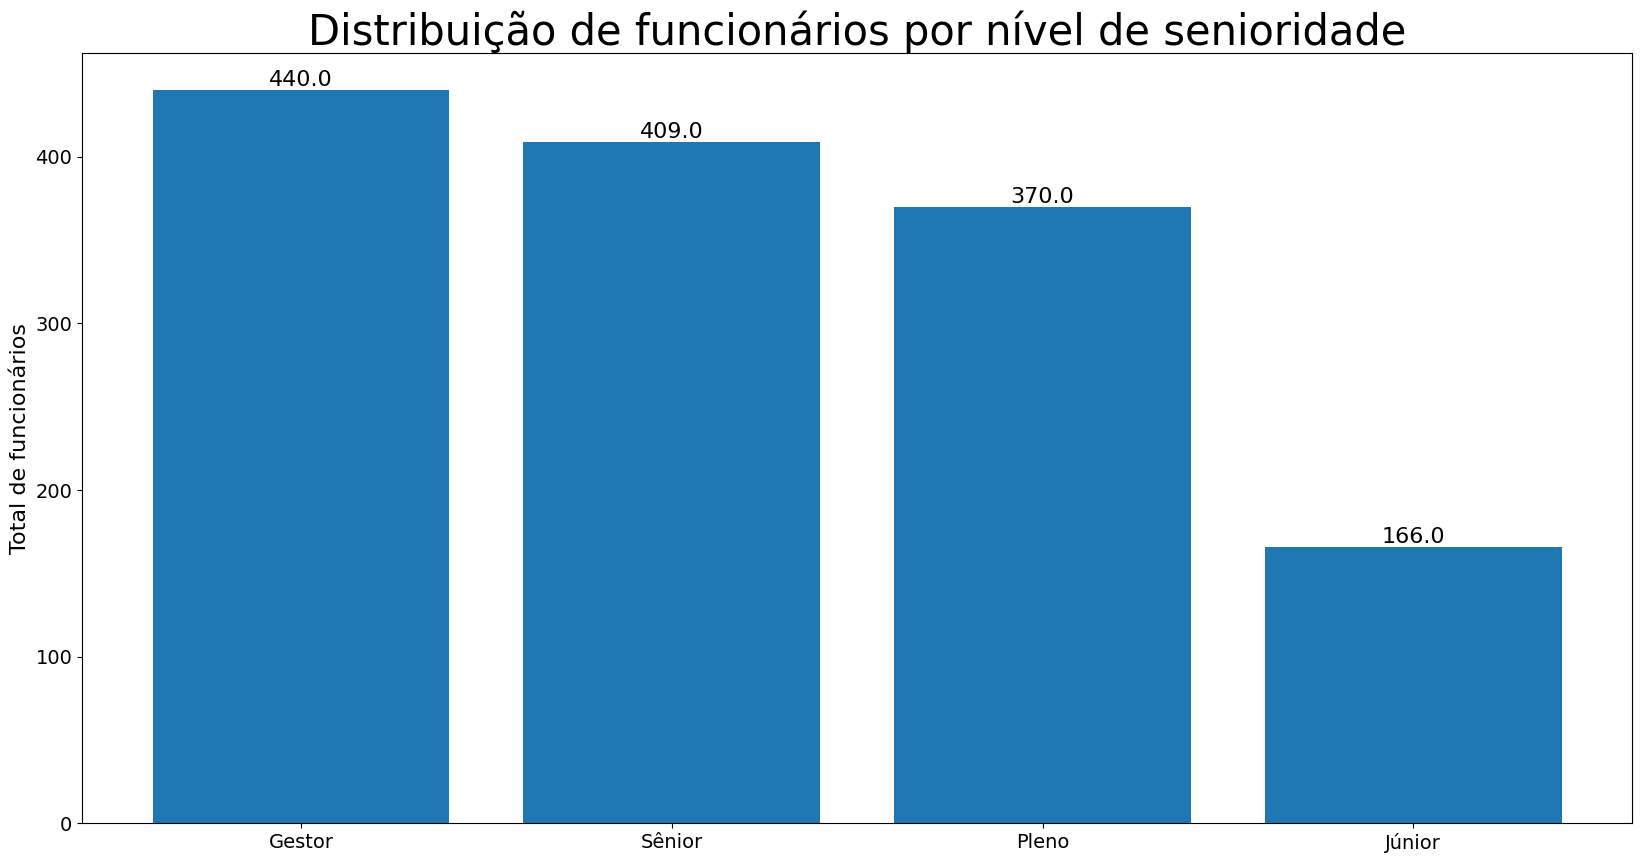

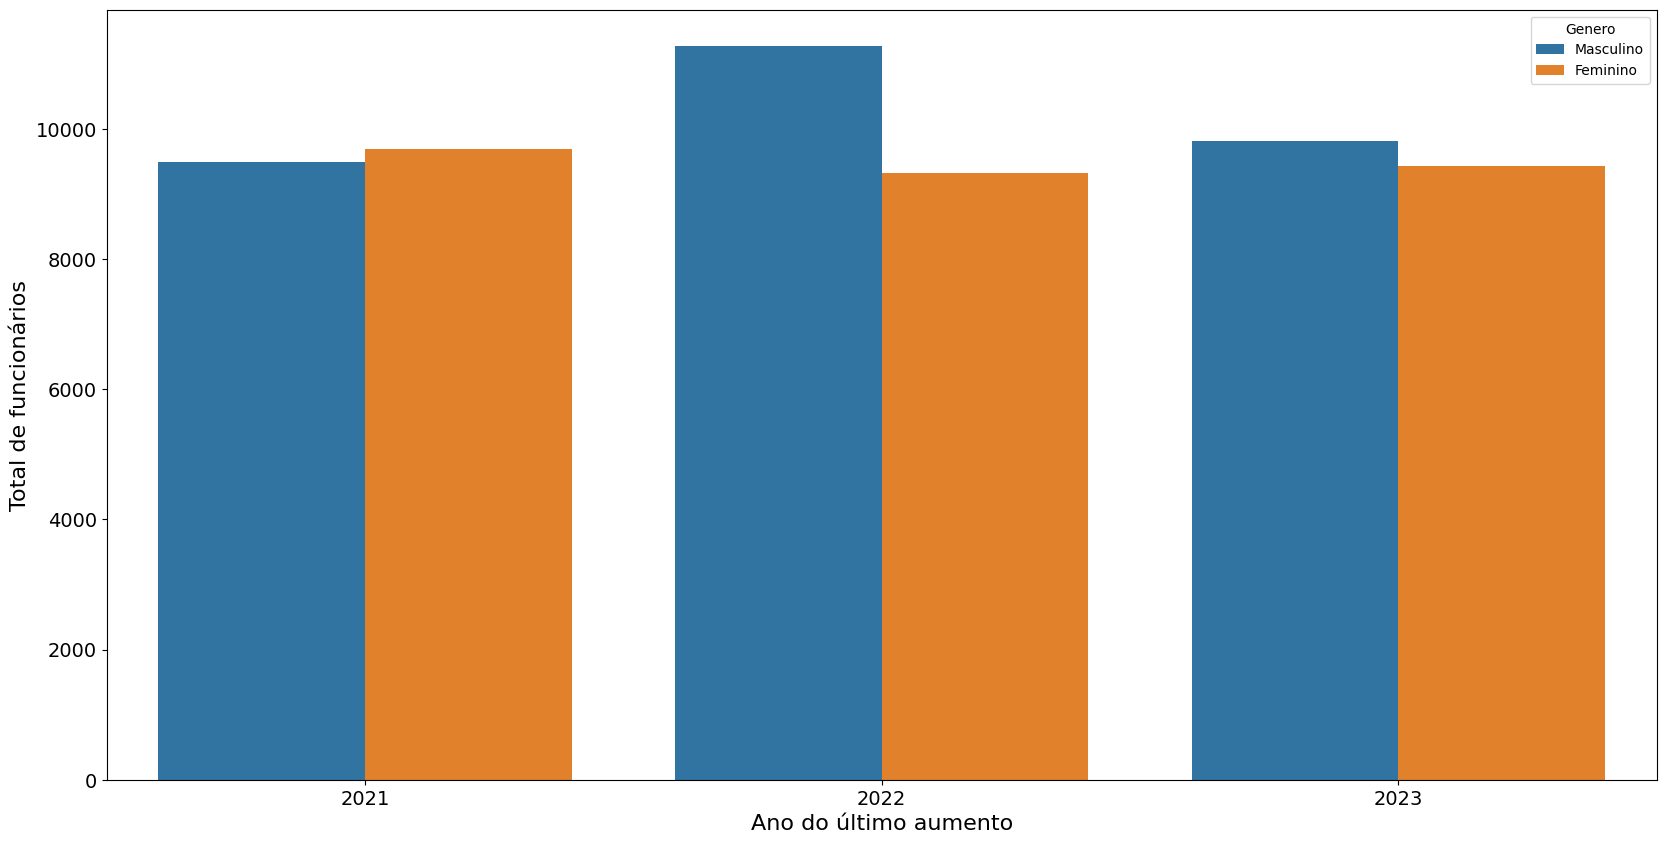

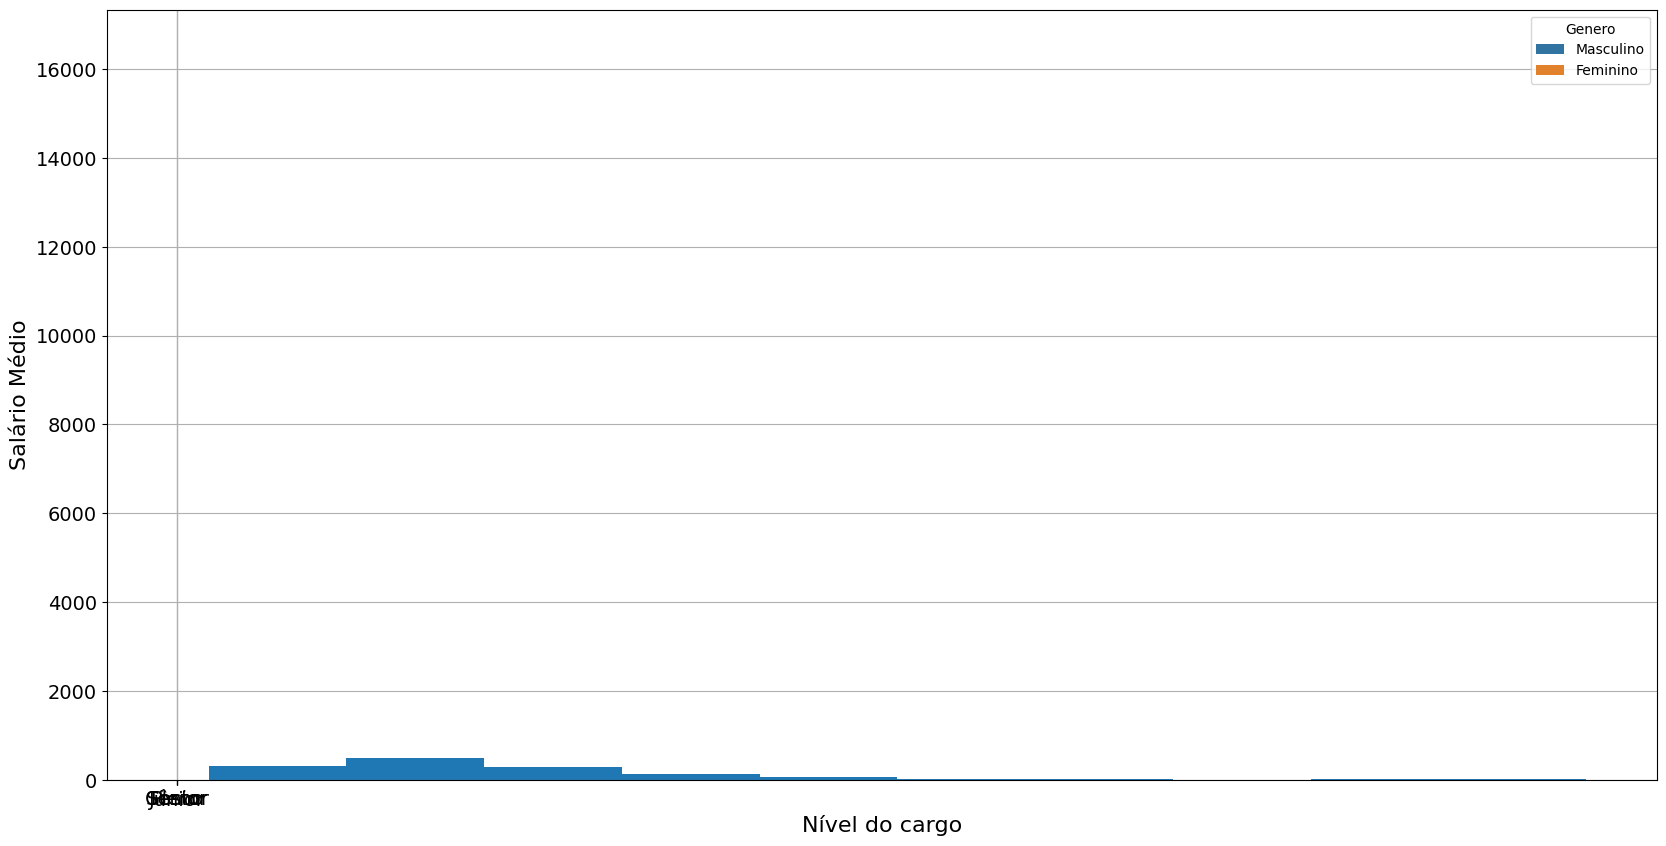

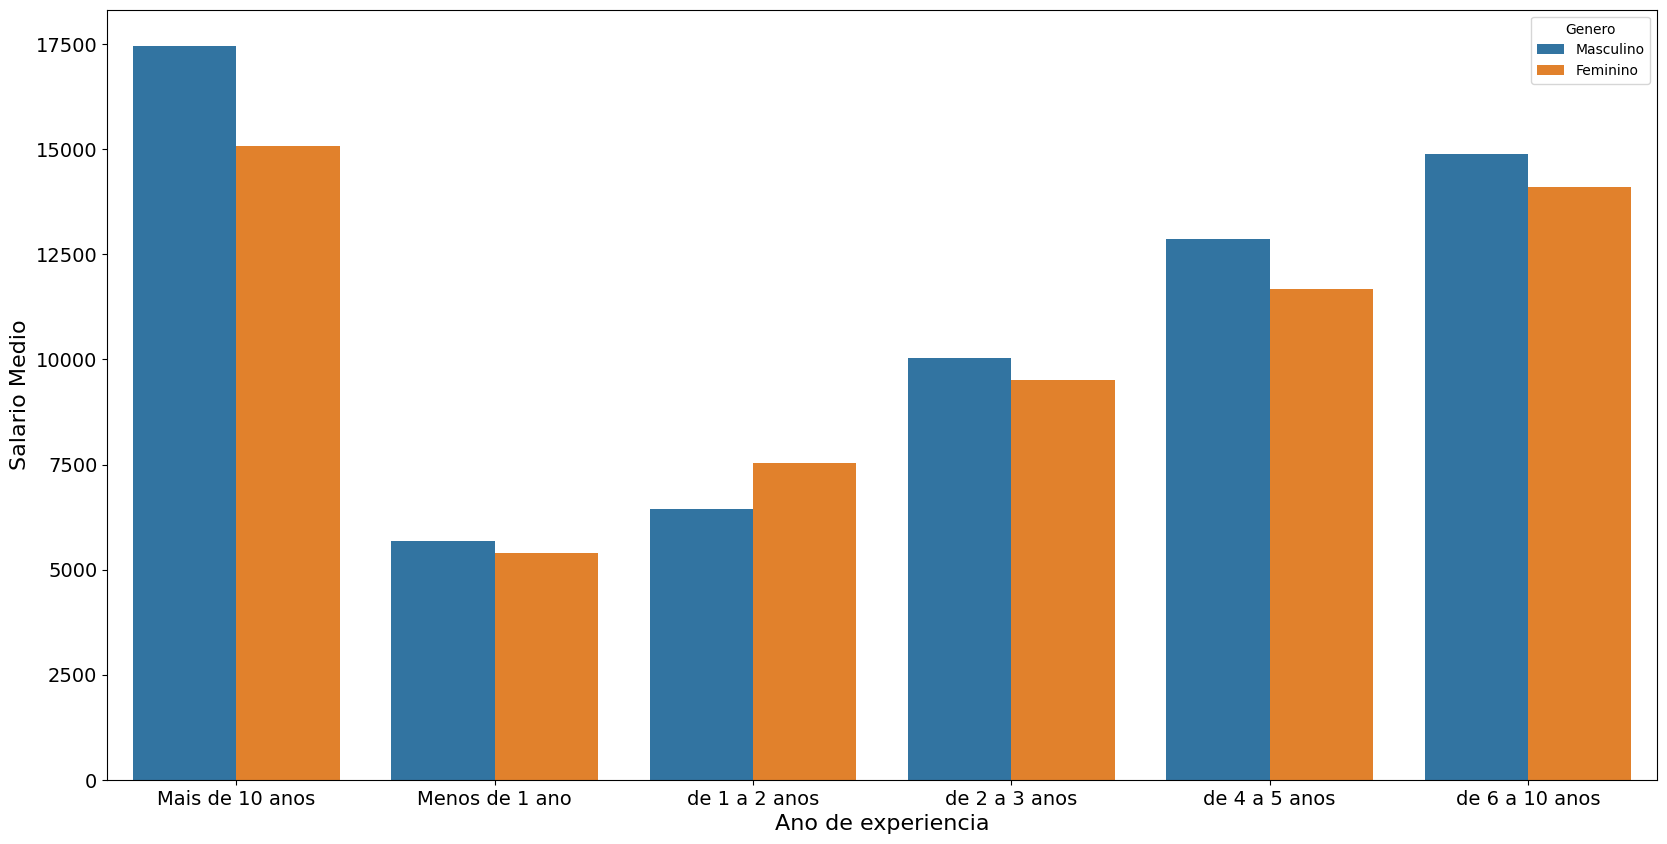

In [10]:
dados = pd.read_csv('dados_salarial_funcionarios.csv')
dados.columns

dados.head()
dados.shape
dados.dtypes
# Coluna data está como texto e precisamos trnasformá-la para data
dados['Data ultimo aumento'] = pd.to_datetime(dados['Data ultimo aumento'])
dados.head()
numerica_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

# Resumo das variáveis numéricas - Imprime alguns valores de medidas
dados[numerica_cols].describe()
dados[categoricas_cols].describe()
# veirifica se há valores faltantes
dados.isna().any()
dados.isna().sum()
dados['Area Formacao'].fillna('Nada Consta', inplace=True)
dados.isna().sum()

dados.duplicated().sum()
dados.drop_duplicates(inplace=True)
dados.shape
dados['Nivel'].value_counts()
dados['Faixa Salarial'].value_counts()

dados['Média Salarial'] = dados['Faixa Salarial – numero'].mean().round()
dados.head()

dados['Genero'].value_counts()
plt.figure(figsize=(20,10))
grafico_1 = plt.bar(dados['Genero'].unique(), dados['Genero'].value_counts())
plt.title('Distribuição de funcionários - Homens e Mulheres', fontsize=30)
plt.ylabel('Total de funcionários', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.bar_label(grafico_1, fmt="%.01f", size=16, label_type="edge")

plt.figure(figsize=(20,10))
sns.countplot(y="Genero", data=dados, order=dados['Genero'].value_counts().index)\
  .set_title("Distribuição de funcionários - Homens e Mulheres")
plt.figure(figsize=(20,10))
grafico_2 = plt.bar(dados['Nivel Ensino'].unique(), dados['Nivel Ensino'].value_counts())
plt.title('Distribuição de funcionários por nível de formação', fontsize=30)
plt.ylabel('Total de funcionários', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.bar_label(grafico_2, fmt="%.01f", size=16, label_type="edge")
plt.figure(figsize=(20,10))
grafico_3 = plt.bar(dados['Nivel'].unique(), dados['Nivel'].value_counts())
plt.title('Distribuição de funcionários por nível de senioridade', fontsize=30)
plt.ylabel('Total de funcionários', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.bar_label(grafico_3, fmt="%.01f", size=16, label_type="edge")
dados['Data ultimo aumento - Ano'] = dados['Data ultimo aumento'].dt.year
dados["Data ultimo aumento - Ano"] = dados['Data ultimo aumento - Ano'].astype(str)
dados.dtypes
media_salarial_ano = dados.groupby(['Data ultimo aumento - Ano', 'Genero'])['Faixa Salarial – numero'].mean().round(0)
media_salarial_ano.head()
media_salarial_ano = media_salarial_ano.reset_index(name='Salario Medio')
media_salarial_ano.head()
plt.figure(figsize=(20,10))
sns.barplot(x='Data ultimo aumento - Ano', y='Salario Medio', hue='Genero', data=media_salarial_ano, hue_order=['Masculino', 'Feminino'])

plt.ylabel('Total de funcionários', fontsize=16)
plt.xlabel('Ano do último aumento', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

media_nivel_cargo = dados.groupby(['Genero', 'Nivel'])['Faixa Salarial – numero'].mean()
media_nivel_cargo.head()
media_nivel_cargo = media_nivel_cargo.reset_index(name='Salario Medio')
media_nivel_cargo.head()
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel', y='Salario Medio', hue='Genero', data=media_nivel_cargo, hue_order=['Masculino', 'Feminino'])

plt.ylabel('Salário Médio', fontsize=16)
plt.xlabel('Nível do cargo', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

dados['Faixa Salarial – numero'].hist()
media_anos_experiencia = dados.groupby(['Genero', 'Anos experiencia'])['Faixa Salarial – numero'].mean()
media_anos_experiencia.head()
media_anos_experiencia = media_anos_experiencia.reset_index(name='Salario Medio')
media_anos_experiencia.head()
plt.figure(figsize=(20,10))
sns.barplot(x='Anos experiencia', y='Salario Medio', hue='Genero', data=media_anos_experiencia, hue_order=['Masculino', 'Feminino'])

plt.ylabel('Salario Medio', fontsize=16)
plt.xlabel('Ano de experiencia', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);


Text(0.5, 1.0, 'Distribuição dos salários')

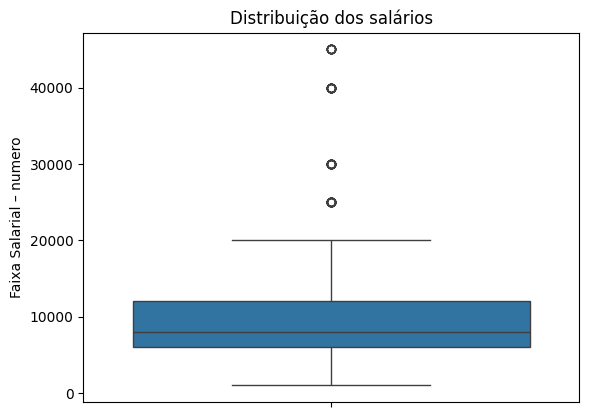

In [4]:
sns.boxplot(dados['Faixa Salarial – numero']).set_title("Distribuição dos salários")

In [11]:
dados['Genero'] = LabelEncoder().fit_transform(dados['Genero'])
dados.head()

,Idade,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento,Média Salarial,Data ultimo aumento - Ano
0,38,1,Pós-graduação,Química / Física,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,2021-02-01,9993.0,2021
1,39,1,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,2021-06-04,9993.0,2021
2,30,1,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-04-15,9993.0,2023
3,38,0,Pós-graduação,Outras,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,2021-04-06,9993.0,2021
4,36,1,Pós-graduação,Outras Engenharias,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-03-22,9993.0,2023


In [12]:
def atribuir_valor_numerico(categoria):
  if categoria == 'Menos de 1 ano':
    return 1
  elif categoria == 'de 1 a 2 anos':
    return 1.5
  elif categoria == 'de 2 a 3 anos':
    return 3.5
  elif categoria == 'de 4 a 5 anos':
    return 4.5
  elif categoria == 'de 6 a 10 anos':
    return 8
  elif categoria == 'Mais de 10 anos':
    return 15
  else:
    return None
  
dados['Anos experiencia - numerico'] = dados['Anos experiencia'].apply(atribuir_valor_numerico)
dados.columns

Index(['Idade', 'Genero', 'Nivel Ensino', 'Area Formacao', 'Setor', 'Nivel',
       'Faixa Salarial', 'Anos experiencia', 'Faixa Salarial – numero',
       'Data ultimo aumento', 'Média Salarial', 'Data ultimo aumento - Ano',
       'Anos experiencia - numerico'],
      dtype='object')

In [13]:
dados_num = dados.drop(['Nivel Ensino', 'Area Formacao', 'Setor', 'Nivel', 'Faixa Salarial', 'Anos experiencia', 'Data ultimo aumento',  'Média Salarial', 'Data ultimo aumento - Ano'], axis = 1)
dados_num.head()

,Idade,Genero,Faixa Salarial – numero,Anos experiencia - numerico
0,38,1,6000,15.0
1,39,1,8000,3.5
2,30,1,12000,1.5
3,38,0,16000,15.0
4,36,1,12000,1.5


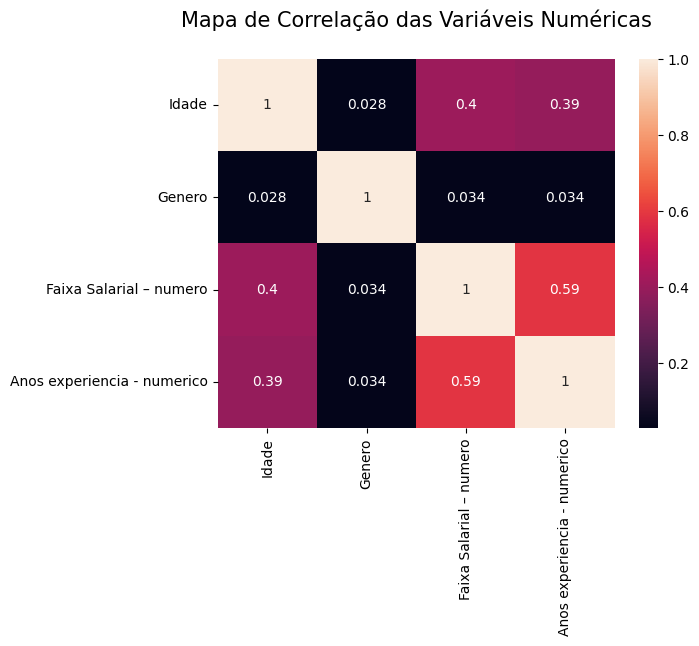

In [14]:
sns.heatmap(dados_num.corr('spearman'), annot=True)
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

In [16]:
X = dados_num.drop(['Faixa Salarial – numero'], axis=1)
X.head()

,Idade,Genero,Anos experiencia - numerico
0,38,1,15.0
1,39,1,3.5
2,30,1,1.5
3,38,0,15.0
4,36,1,1.5


In [17]:
Y = dados_num['Faixa Salarial – numero']
Y.head()

0     6000
1     8000
2    12000
3    16000
4    12000
Name: Faixa Salarial – numero, dtype: int64

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [19]:
print(X_train.shape)
X_train.head()

(969, 3)


,Idade,Genero,Anos experiencia - numerico
772,31,1,8.0
266,27,1,8.0
327,36,1,1.5
348,28,0,4.5
423,27,0,4.5


In [22]:
print(X_test.shape)
X_test.head(1)

(416, 3)


,Idade,Genero,Anos experiencia - numerico
1128,25,1,1.5


In [23]:
Y_test.head()

1128     4000
237      3000
163     12000
739     12000
51      12000
Name: Faixa Salarial – numero, dtype: int64

In [25]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [26]:
valores_preditos_rf = model_rf.predict(X_test)
valores_preditos_rf

array([ 5771.12005453, 13137.44037421, 20095.01587302,  8275.5       ,
       13899.76190476,  5809.08333333,  3847.33169608, 12314.82905983,
       13137.44037421, 11114.61777112, 10209.72527696,  6198.01587302,
        5809.08333333,  6198.01587302, 15253.37146187,  8125.8459041 ,
        9577.83333333,  9832.54040404,  4238.26667777, 14024.06223451,
       10040.4996115 , 11114.61777112,  2546.73088023, 12314.82905983,
        4574.06584265,  5207.8238567 ,  8688.75396825, 22288.15873016,
       20257.53373016,  9832.54040404, 10209.72527696, 14980.        ,
        5091.33333333, 14405.17460317,  7142.33333333, 16582.46901138,
        8655.73448773,  8899.73847936,  4015.34598735, 18116.5       ,
       16010.76190476,  6029.41269841,  2015.26587302, 13723.0952381 ,
       14024.06223451,  9637.79628705, 10209.72527696, 13897.29484404,
        8879.20530699,  6984.11688312, 10027.81490731,  9739.83333333,
       17493.35930736,  3807.13095238, 15205.95238095, 11270.88888889,
      

In [28]:
model_rf.feature_importances_
feature_importances = pd.DataFrame(model_rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
Anos experiencia - numerico,0.485120
Idade,0.410419
Genero,0.104461


In [30]:
mse = mean_squared_error(Y_test, valores_preditos_rf)
mse

40047449.604191154

In [32]:
mae = mean_absolute_error(Y_test, valores_preditos_rf)
mae

4353.647615769233

In [33]:
r2_score(Y_test, valores_preditos_rf)

0.1648380133859545

In [35]:
model_rf_parametros = RandomForestRegressor(max_depth=29, min_samples_leaf=32, min_samples_split=28, n_estimators=208, random_state=43)
model_rf_parametros.fit(X_train, Y_train)

RandomForestRegressor(max_depth=29, min_samples_leaf=32, min_samples_split=28,
                      n_estimators=208, random_state=43)

In [36]:
valores_preditos_rf_parametros = model_rf_parametros.predict(X_test)
pd.DataFrame(valores_preditos_rf_parametros).round(1)

,0
0,5837.2
1,10840.5
2,17126.1
3,8150.8
4,14218.8
...,...
411,9718.9
412,11098.9
413,4097.2
414,9083.5


In [37]:
model_rf_parametros.feature_importances_
feature_importances = pd.DataFrame(model_rf_parametros.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
Anos experiencia - numerico,0.837231
Idade,0.155928
Genero,0.006841


In [38]:
mse = mean_squared_error(Y_test, valores_preditos_rf_parametros)
mae = mean_absolute_error(Y_test, valores_preditos_rf_parametros)
r2_score(Y_test, valores_preditos_rf_parametros)

0.27209838017209864

In [39]:
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
valores_preditos_xgboost = model_xgboost.predict(X_test)
valores_preditos_xgboost

array([ 5645.6226, 13068.446 , 20263.82  ,  8188.7925, 12262.426 ,
        6172.8945,  3766.3657, 12245.694 , 13068.446 , 11694.955 ,
       10533.964 ,  6551.2363,  6172.8945,  6551.2363, 14439.076 ,
        8352.578 ,  3572.5652,  9140.09  ,  4233.152 , 14042.099 ,
        9876.125 , 11694.955 ,  2244.4626, 12245.694 ,  4724.6436,
        5202.0527,  9288.821 , 15640.317 , 17288.87  ,  9140.09  ,
       10533.964 , 12002.522 ,  5391.0054, 13949.034 ,  7059.036 ,
       16678.75  ,  8881.32  ,  8720.666 ,  4055.7822, 17677.932 ,
       15867.892 ,  6004.2563,  1817.5685, 10006.239 , 14042.099 ,
        9330.148 , 10533.964 , 14083.922 ,  8942.644 ,  6897.338 ,
       10044.34  ,  6153.2266, 19770.596 ,  3973.9666, 15045.674 ,
       18513.246 , 11985.932 , 17133.785 ,  7820.617 ,  6337.9023,
       12740.406 , 15903.76  ,  8046.67  , 14529.529 ,  3585.4788,
       18370.352 , 12118.972 ,  4161.6553,  4547.606 ,  6183.4653,
        4290.2485, 16885.312 , 12677.458 ,  7820.617 ,  5645.6

In [41]:
model_xgboost.feature_importances_
feature_importances = pd.DataFrame(model_xgboost.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
Anos experiencia - numerico,0.613865
Idade,0.202229
Genero,0.183905


In [42]:
mse = mean_squared_error(Y_test, valores_preditos_xgboost)
mae = mean_absolute_error(Y_test, valores_preditos_xgboost)
r2_score(Y_test, valores_preditos_xgboost)

0.05641534848785856